# Welcome to the Motion Gestures Toolbox (Python) - Tutorial/Documentation

### Video visualisation
Videos can be watched as they are, but they can also be used to develop new visualisations to be used for analysis. The aim of creating such alternate displays from video recordings is to uncover features, structures and similarities within the material itself, and in relation to, for example, score material. Three useful visualisation techniques here are motion images, motion history images and motiongrams.

MGT can generate both dynamic and static visualizations, as well as some quantitative data:

- dynamic visualisations (video files)
- motion video
- motion history video
- static visualisations (images)
- motion average image
- motiongrams
- videograms
- motion data (csv files)
- quantity of motion
- centroid of motion
- area of motion

In the following we will try this ourselves, and look at the different types.

#### Starting off we will do a few imports, and the tutorial depends on these modules being installed/downloaded.

In [8]:
import mgmodule
import cv2
from matplotlib import pyplot as plt

Now we create our mg (motion gestures) object, which takes the video and gives the video attributes and functions that can be used upon it to extract useful/fun videos, images and information.

In [9]:
mg = mgmodule.MgObject('dance.avi', starttime = 5, endtime = 10, skip = 5)

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


### Motion video analysis

By calling the motionvideo function, we will generate a number of files from the input video, in the same location as the source file.

These include:
- dance_motion.avi: the motion video that is used as the source for the rest of the analysis
- dance_mgx.bmp: a horizontal motiongram
- dance_mgy.bmp: a vertical motiongram
- dance_motion_com_qom.eps: an image file with plots of centroid and quantity of motion

We will examine each of these in a little more detail.

In [10]:
mg.motionvideo()

In [11]:
ls

LICENSE                             dance_motion_com_qom.eps
Module_documentation/               dance_trim.avi
MotionGesturesToolbox.ipynb         dance_trim_skip.avi
README.md                           dance_trim_skip_mgx.bmp
README.rst                          dance_trim_skip_mgy.bmp
__pycache__/                        dance_trim_skip_motion.avi
_motionaverage.py                   dance_trim_skip_motion_com_qom.eps
dance.avi                           documentation.docx
dance_mgx.bmp                       mgmodule/
dance_mgy.bmp                       setup.py
dance_motion.avi                    showvideo.py


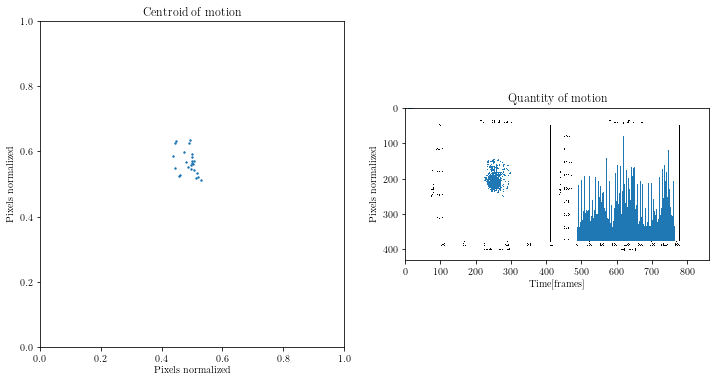

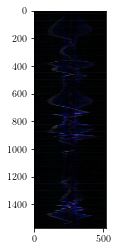

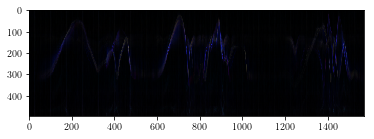

In [12]:
com_qom = plt.imread('dance_motion_com_qom.eps')
mgx = plt.imread('dance_mgx.bmp')
mgy = plt.imread('dance_mgy.bmp')
plt.imshow(com_qom); plt.show()
plt.imshow(mgx); plt.show()
plt.imshow(mgy); plt.show()



In [13]:
#Press q to quit the video
mg.show('dance_motion.avi')